# AirBnb Montreal
## Author : Saif Ahmed

Summary: The goal of this project is to analyze AirBnb listings in Montreal, to determine how AirBnb listings are distributed across Montreal. Based on the analysis, the conclusions dervied are:

- The total of top 10 AirBnb hosts in Montreal is almost 5.35%(682 listings) of the whole dataset (12750 listings)
- Most listings are concentrated around downtown Montreal
- Ville-Marie as the highest number of AirBnb listings
- Pointe-Claire has the most expensive price per night with a median 160CAD
- Top relevant words used in AirBnb listings are heart and downtown

In [1]:
# Acquire and load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [2]:
airbnb_montreal = pd.read_csv('listings_Montreal.csv')
airbnb_montreal.head()

id                                name  host_id host_name  \
0  29059        Lovely studio Quartier Latin   125031  Maryline   
1  29061  Maison historique - Quartier Latin   125031  Maryline   
2  31847               Downtown/Airport room     2319      Gail   
3  34715        Chez Patrac ! Métro Beaubien   149769     Alain   
4  36301   Romantic & peaceful Plateau  loft   381468    Sylvie   

   neighbourhood_group              neighbourhood  latitude  longitude  \
0                  NaN                Ville-Marie  45.51939  -73.56482   
1                  NaN                Ville-Marie  45.51929  -73.56493   
2                  NaN               Le Sud-Ouest  45.48467  -73.57995   
3                  NaN  Rosemont-La Petite-Patrie  45.53818  -73.60360   
4                  NaN      Le Plateau-Mont-Royal  45.53026  -73.58413   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt    152               2                344  2021-12-04   
1  Entire home/apt    242               3                 85  2021-12-03   
2     Private room     50               1                157  2021-09-06   
3  Entire home/apt    160               4                  6  2021-11-29   
4  Entire home/apt    130              31                 42  2021-08-31   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               2.46                               2               323   
1               0.71                               2               283   
2               1.12                               3               350   
3               0.04                               1               208   
4               0.53                               7               176   

   number_of_reviews_ltm  license  
0                     14      NaN  
1                     16      NaN  
2                      4      NaN  
3                      2  261 026  
4                      3      NaN

In [3]:
airbnb_montreal.shape

(12570, 18)

In [4]:
airbnb_montreal.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [5]:
airbnb_montreal['neighbourhood'].unique()

array(['Ville-Marie', 'Le Sud-Ouest', 'Rosemont-La Petite-Patrie',
       'Le Plateau-Mont-Royal', 'Côte-des-Neiges-Notre-Dame-de-Grâce',
       'Montréal-Ouest', 'Villeray-Saint-Michel-Parc-Extension',
       "Baie-d'Urfé", 'Mercier-Hochelaga-Maisonneuve', 'LaSalle',
       'Verdun', 'Outremont', 'Lachine', 'Côte-Saint-Luc',
       'Ahuntsic-Cartierville', 'Saint-Laurent', 'Saint-Léonard',
       'Westmount', 'Pierrefonds-Roxboro',
       'Rivière-des-Prairies-Pointe-aux-Trembles', 'Anjou',
       'Pointe-Claire', 'Mont-Royal', 'Dollard-des-Ormeaux', 'Hampstead',
       'Dorval', 'Kirkland', "L'Île-Bizard-Sainte-Geneviève",
       'Montréal-Nord', 'Beaconsfield', 'Sainte-Anne-de-Bellevue',
       'Montréal-Est'], dtype=object)

In [6]:
airbnb_montreal['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [7]:
#Cleaning data
airbnb_montreal.isnull().sum()

id                                    0
name                                  5
host_id                               0
host_name                             5
neighbourhood_group               12570
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        2857
reviews_per_month                  2857
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           12126
dtype: int64

In [8]:
airbnb_montreal.drop(['id','neighbourhood_group','host_name','last_review','license'],axis=1,inplace=True)
airbnb_montreal.head()

name  host_id              neighbourhood  \
0        Lovely studio Quartier Latin   125031                Ville-Marie   
1  Maison historique - Quartier Latin   125031                Ville-Marie   
2               Downtown/Airport room     2319               Le Sud-Ouest   
3        Chez Patrac ! Métro Beaubien   149769  Rosemont-La Petite-Patrie   
4   Romantic & peaceful Plateau  loft   381468      Le Plateau-Mont-Royal   

   latitude  longitude        room_type  price  minimum_nights  \
0  45.51939  -73.56482  Entire home/apt    152               2   
1  45.51929  -73.56493  Entire home/apt    242               3   
2  45.48467  -73.57995     Private room     50               1   
3  45.53818  -73.60360  Entire home/apt    160               4   
4  45.53026  -73.58413  Entire home/apt    130              31   

   number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0                344               2.46                               2   
1                 85               0.71                               2   
2                157               1.12                               3   
3                  6               0.04                               1   
4                 42               0.53                               7   

   availability_365  number_of_reviews_ltm  
0               323                     14  
1               283                     16  
2               350                      4  
3               208                      2  
4               176                      3

In [9]:
airbnb_montreal['reviews_per_month'].fillna(0,inplace=True)

In [10]:
#Exploring and visualizing data
top_host_id = airbnb_montreal['host_id'].value_counts().head(10)
print (top_host_id)

38459934     147
195649860     81
72761895      75
243746900     66
223679880     65
487327        65
315956014     52
8242798       48
73995257      47
387422        36
Name: host_id, dtype: int64


[Text(0, 0, '38459934'),
 Text(0, 0, '195649860'),
 Text(0, 0, '72761895'),
 Text(0, 0, '243746900'),
 Text(0, 0, '223679880'),
 Text(0, 0, '487327'),
 Text(0, 0, '315956014'),
 Text(0, 0, '8242798'),
 Text(0, 0, '73995257'),
 Text(0, 0, '387422')]

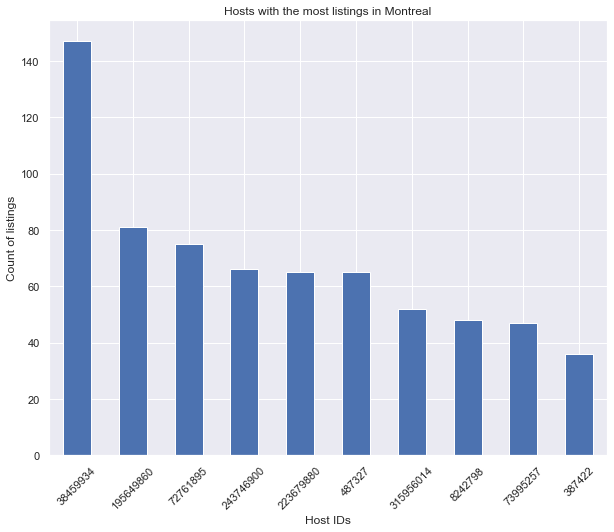

In [11]:
sns.set(rc={'figure.figsize':(10,8)})
viz_bar = top_host_id.plot(kind='bar')
viz_bar.set_title('Hosts with the most listings in Montreal')
viz_bar.set_xlabel('Host IDs')
viz_bar.set_ylabel('Count of listings')
viz_bar.set_xticklabels(viz_bar.get_xticklabels(), rotation=45)

In [12]:
# Top Neighbourhood
top_neighbourhood = airbnb_montreal.neighbourhood.value_counts().head(10)
print(top_neighbourhood)
# Ville-Marie as the highest number of airbnb listings

Ville-Marie                             3619
Le Plateau-Mont-Royal                   3099
Rosemont-La Petite-Patrie               1063
Côte-des-Neiges-Notre-Dame-de-Grâce      951
Le Sud-Ouest                             909
Mercier-Hochelaga-Maisonneuve            665
Villeray-Saint-Michel-Parc-Extension     621
Verdun                                   284
Ahuntsic-Cartierville                    274
Saint-Laurent                            159
Name: neighbourhood, dtype: int64


In [13]:
# Top Reviews
top_review = airbnb_montreal.nlargest(10,'number_of_reviews')
print(top_review)
# Majority of airbnb reviews are from users who stayed in Ville-Marie and Le Plateau-Mont-Royal

                                                   name    host_id  \
1406  Best MTL Superhosts!! +No FEES +Downtown +Fast...    4268904   
327                  Montreal DREAMLOFT on the PLATEAU🤩    3998914   
432                    Historic 18 th Century Apartment    3888552   
111                 Eco studio/loft in Mile-End/Plateau     756145   
23       Functional studio (Secret Studio) - Mont Royal  292507076   
345                                         This is it!    9444647   
158                         Skylit Loft in Old Montreal    1176600   
389                  Artsy Plateau Apartment with Patio    3998914   
400                  EcoDesign&Shared Garden&J-T Market    8024983   
25         Family apt (La Famille) - Plateau Mont Royal  292507076   

                  neighbourhood  latitude  longitude        room_type  price  \
1406                Ville-Marie  45.51351  -73.56550     Private room     74   
327       Le Plateau-Mont-Royal  45.52143  -73.57345  Entire home/apt

In [14]:
avg_price = top_review.price.mean()
print('Average price per night: ${}'.format(avg_price))

Average price per night: $104.4


In [15]:
# Visual Map
coord = airbnb_montreal.loc[:,['longitude','latitude']]
coord.describe()

longitude      latitude
count  12570.000000  12570.000000
mean     -73.589360     45.514907
std        0.044094      0.032124
min      -73.956160     45.404680
25%      -73.602730     45.496060
50%      -73.578890     45.517100
75%      -73.564893     45.532850
max      -73.481630     45.699950

In [16]:
BBox = ((airbnb_montreal.longitude.min(),   airbnb_montreal.longitude.max(),      
         airbnb_montreal.latitude.min(), airbnb_montreal.latitude.max()))
print(BBox)

(-73.95616, -73.48163000000001, 45.40468, 45.69995)


In [17]:
import folium
from folium.plugins import HeatMap
map_folium = folium.Map([45.514907,-73.589360],zoom_start=11.4)
HeatMap(airbnb_montreal[['latitude','longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(map_folium)
display(map_folium)
# From the map, we can see clearly the densest listing is located in the heart of downtown Montreal, shown by the orange-red color concentration

In [18]:
# Distribution Maps
airbnb_price = airbnb_montreal[airbnb_montreal.price < 300]

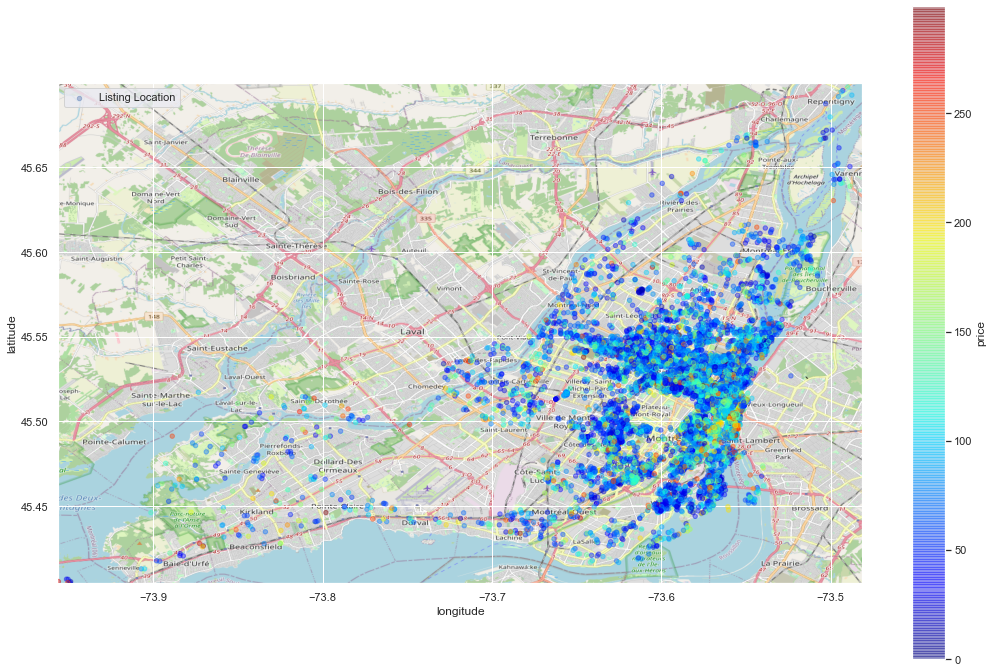

In [19]:
plt.figure(figsize=(18,12))
mont_map = plt.imread('Montreal.png')
plt.imshow(mont_map,zorder=0,extent=BBox)
ax = plt.gca()
airbnb_price.plot(kind='scatter',x='longitude',y='latitude',label='Listing Location', c='price', ax=ax, cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)
plt.legend()
plt.show()

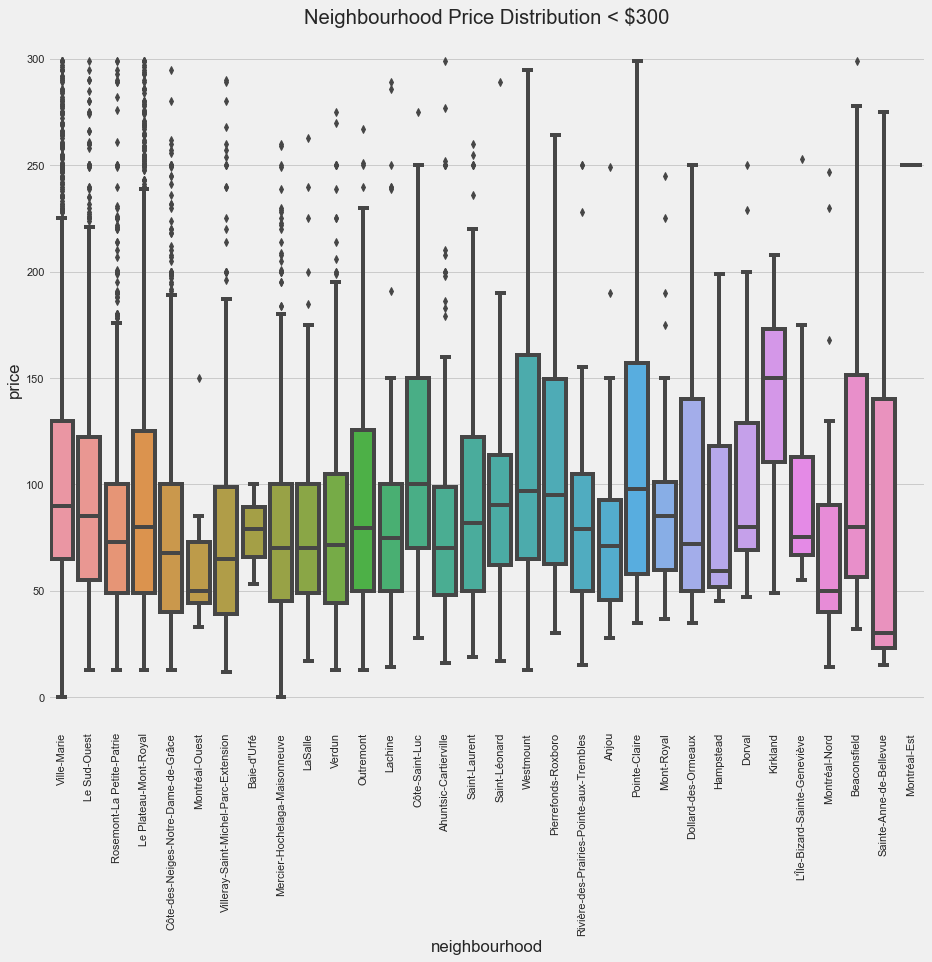

In [20]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14,12))
sns.boxplot(y='price',x='neighbourhood',data = airbnb_price)
plt.title('Neighbourhood Price Distribution < $300')
plt.xticks(rotation=90)
plt.show()
#From the price distribution plot, Pointe-Claire has the most expensive price per night with a median $160.

In [21]:
#Create empty list where we are going to put the name strings
names=[]
#Getting name string from 'name' column and appending it to the empty list
for name in airbnb_montreal.name:
    names.append(name)
#Setting a function to split name strings into seperate words
def split_name(name):
    s = str(name).split()
    return s
#Create empty list where we are going to count the words
names_count = []
#Getting name string to appending it to the names_count list
for n in names:
    for word in split_name(n):
        word = word.lower()
        names_count.append(word)

In [22]:
from collections import Counter
top_25 = Counter(names_count).most_common()
top_25 = top_25[:25]

[Text(0, 0, 'in'),
 Text(0, 0, 'apartment'),
 Text(0, 0, 'downtown'),
 Text(0, 0, 'the'),
 Text(0, 0, 'montreal'),
 Text(0, 0, 'plateau'),
 Text(0, 0, '-'),
 Text(0, 0, 'room'),
 Text(0, 0, 'of'),
 Text(0, 0, 'cozy'),
 Text(0, 0, 'condo'),
 Text(0, 0, 'appartement'),
 Text(0, 0, 'studio'),
 Text(0, 0, '2'),
 Text(0, 0, 'and'),
 Text(0, 0, 'heart'),
 Text(0, 0, 'bedroom'),
 Text(0, 0, 'with'),
 Text(0, 0, 'chambre'),
 Text(0, 0, '&'),
 Text(0, 0, 'to'),
 Text(0, 0, 'loft'),
 Text(0, 0, 'private'),
 Text(0, 0, '|'),
 Text(0, 0, 'du')]

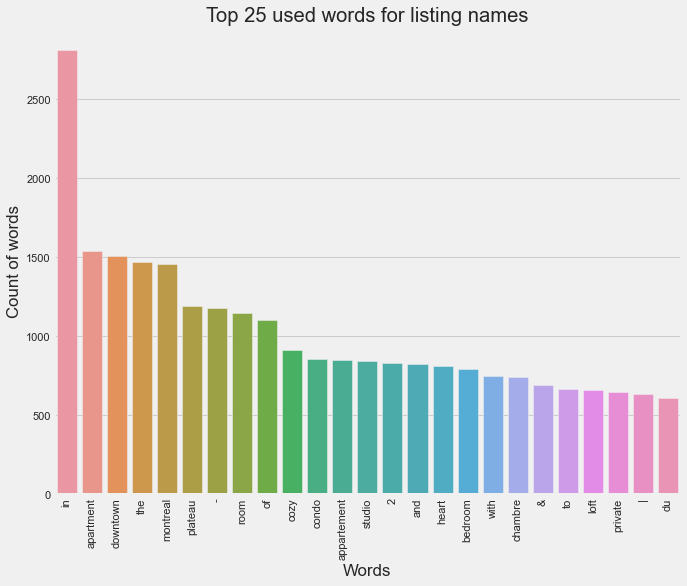

In [23]:
word_count_data = pd.DataFrame(top_25)
word_count_data.rename(columns={0:'Words',1:'Counts'},inplace=True)
viz_count = sns.barplot(x='Words',y='Counts', data = word_count_data)
viz_count.set_title('Top 25 used words for listing names')
viz_count.set_ylabel('Count of words')
viz_count.set_xlabel('Words')
viz_count.set_xticklabels(viz_count.get_xticklabels(),rotation = 90)

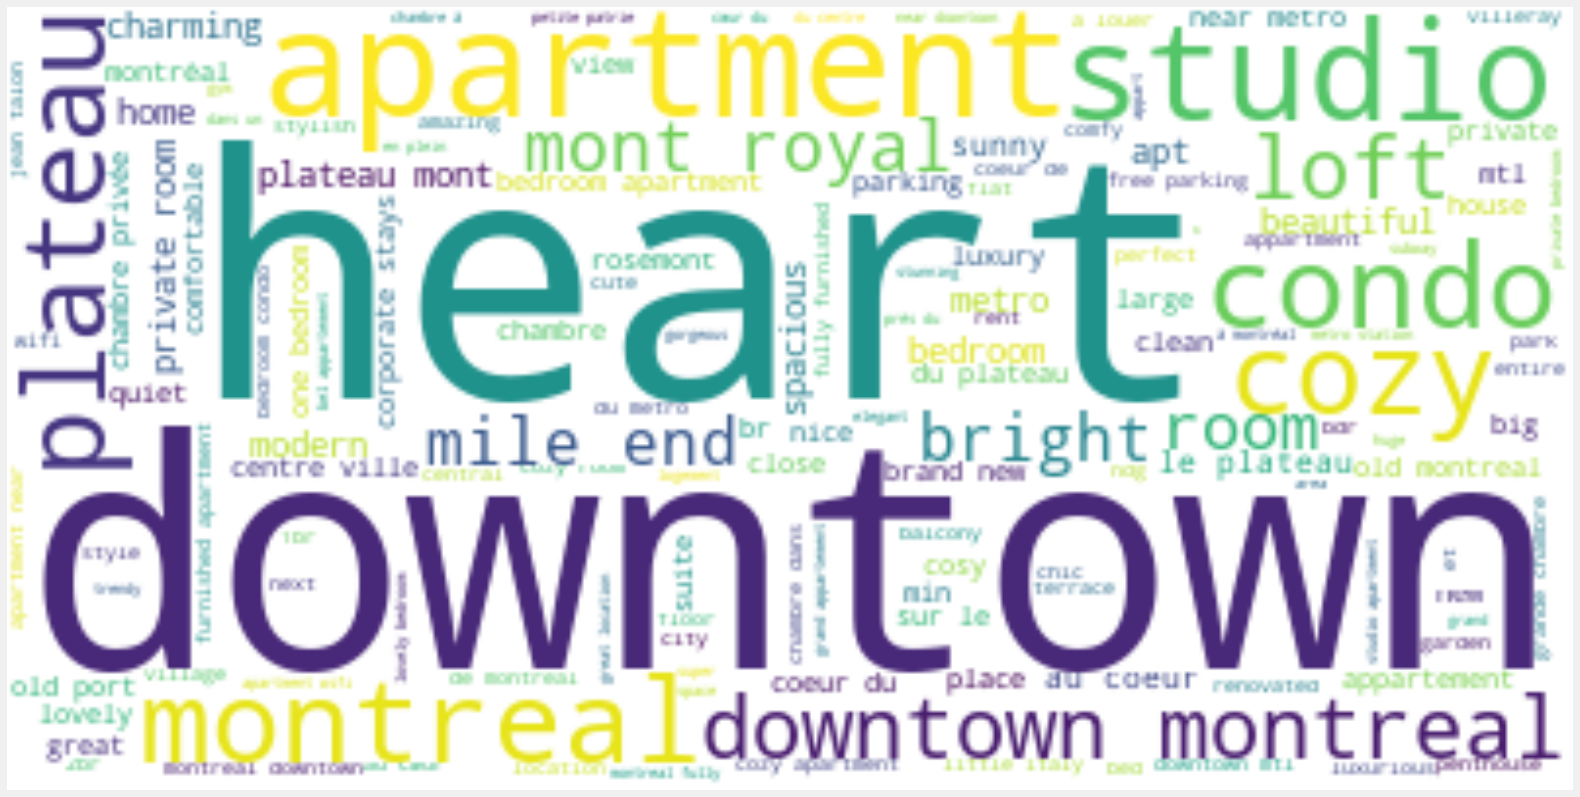

In [24]:
#Word Cloud Visualization
from wordcloud import WordCloud, ImageColorGenerator
text = ' '.join(str(n).lower() for n in airbnb_montreal.name)
#Generate wordcloud image
wordcloud = WordCloud(max_words=200, background_color = 'white').generate(text)
plt.figure(figsize=(25,20))
#Display the image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<ipython-input-25-69a7393a70b8>:11: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



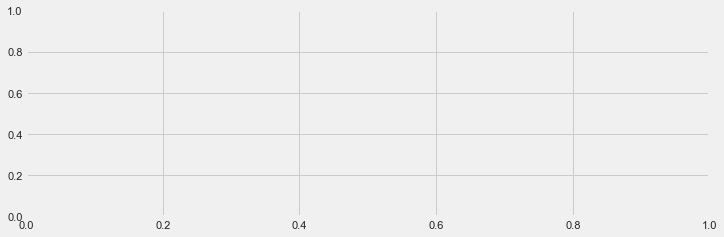

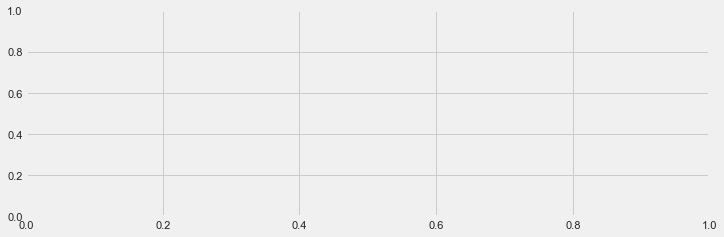

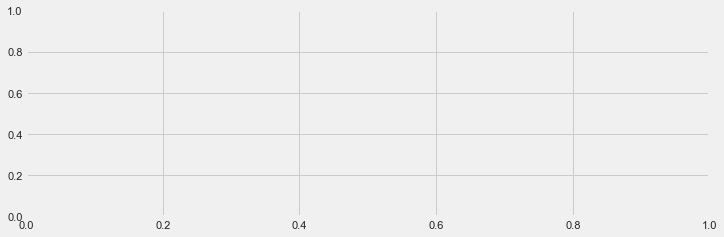

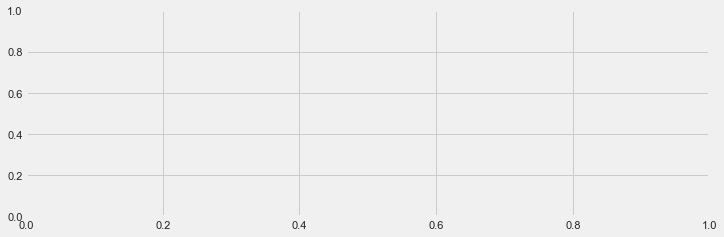

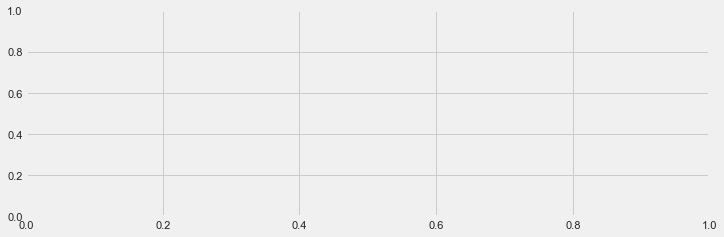

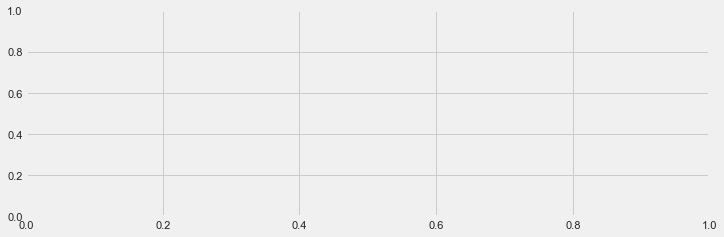

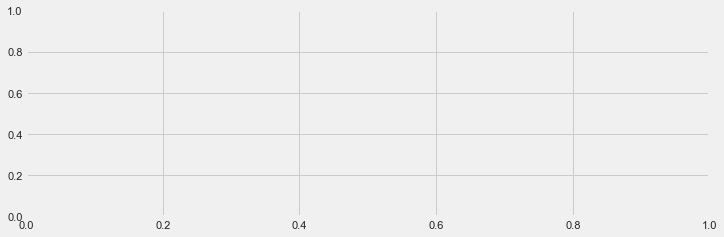

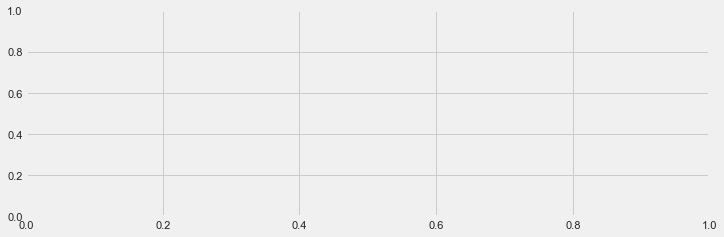

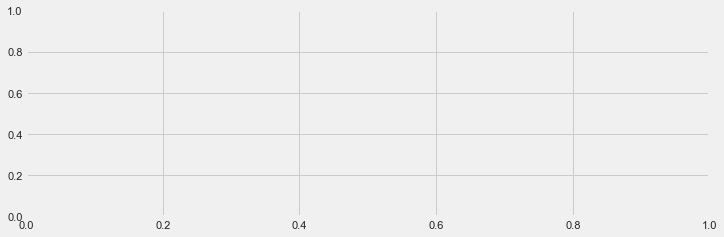

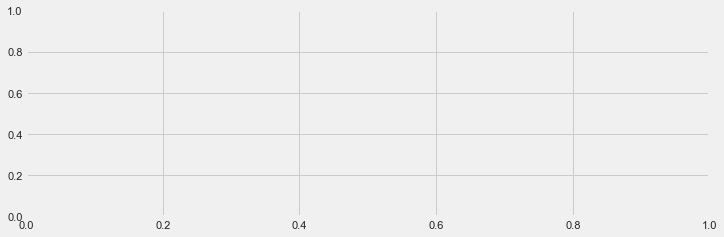

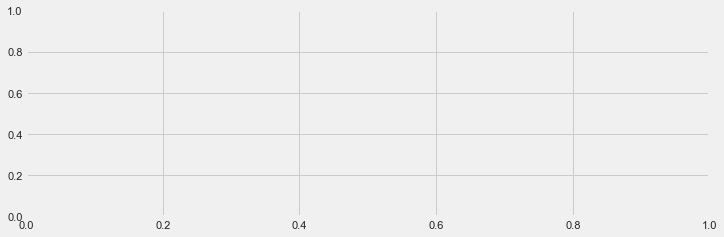

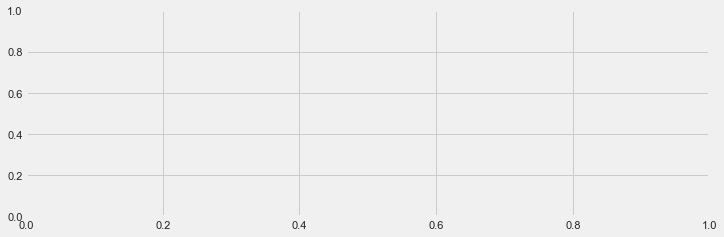

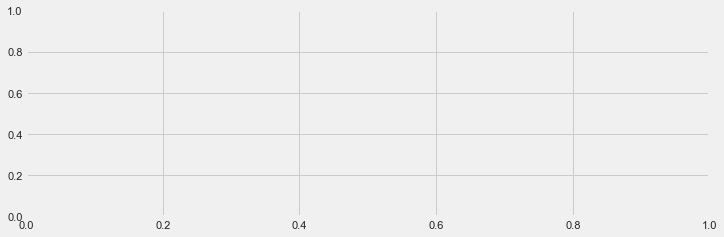

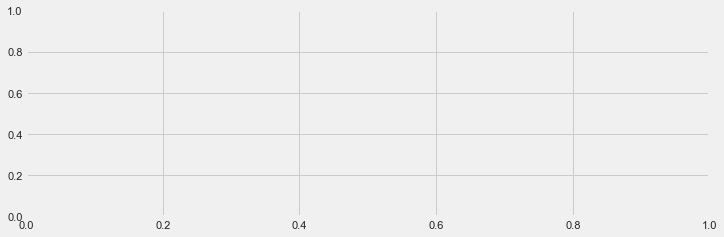

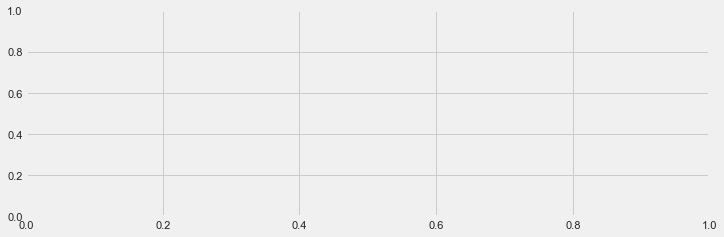

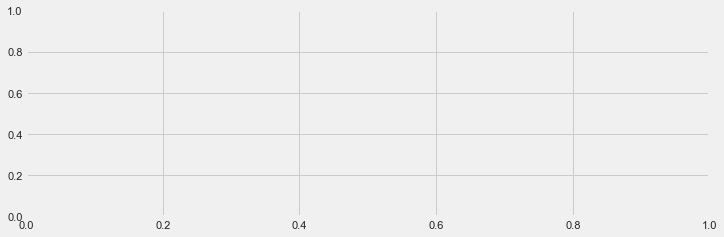

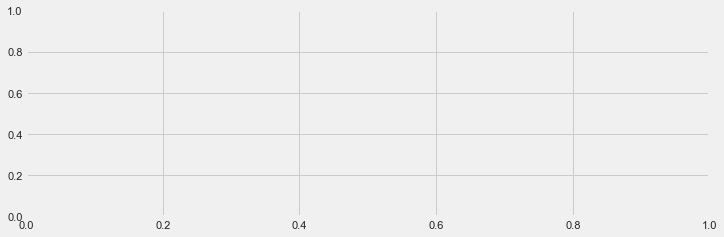

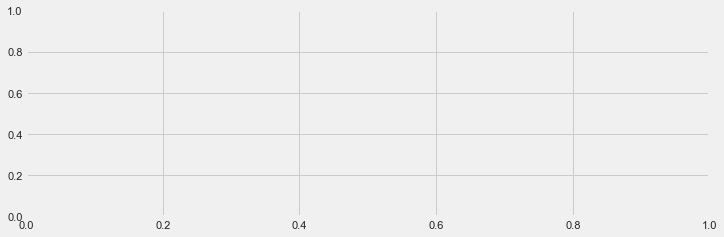

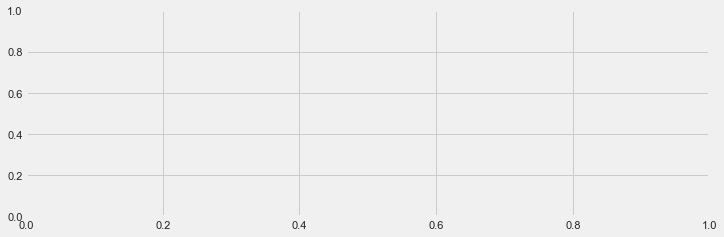

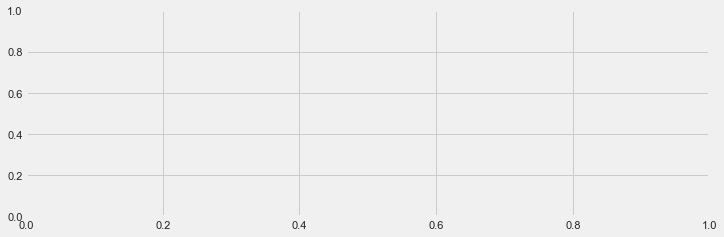

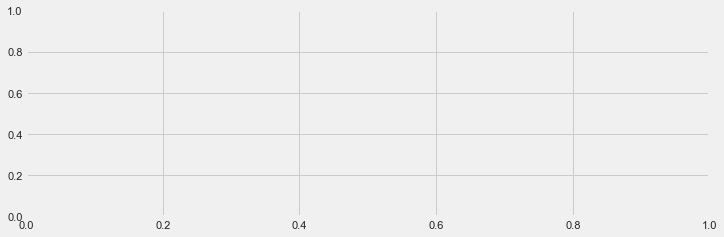

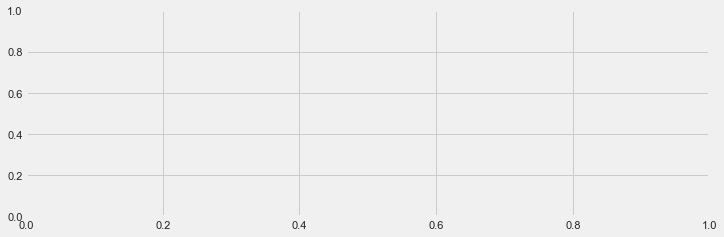

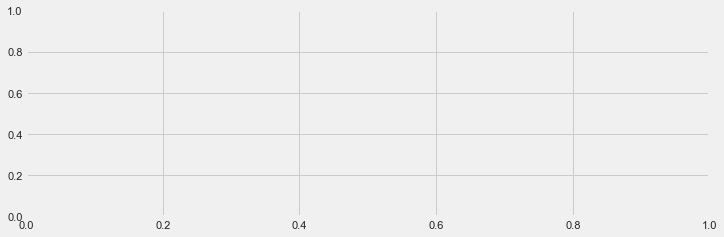

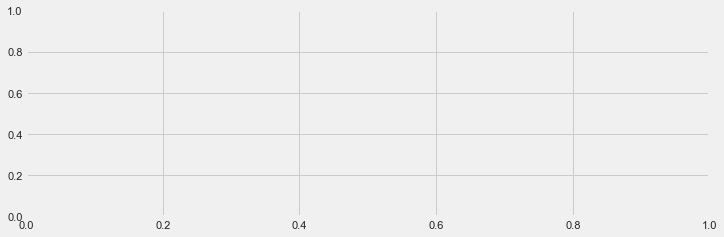

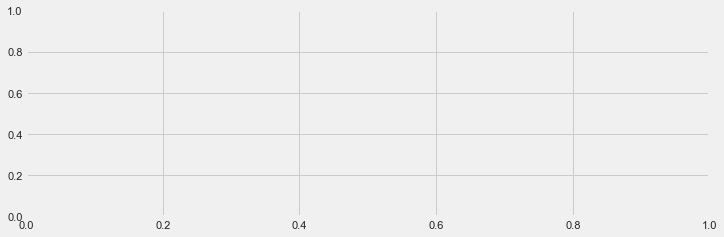

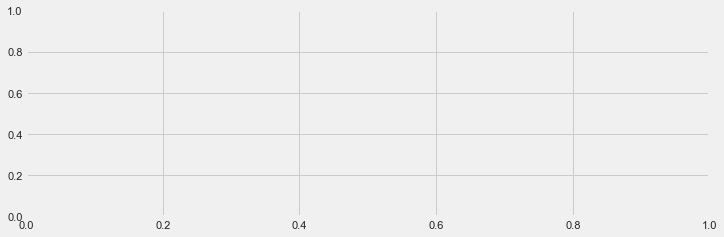

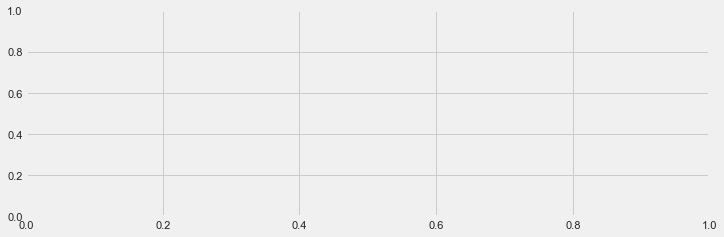

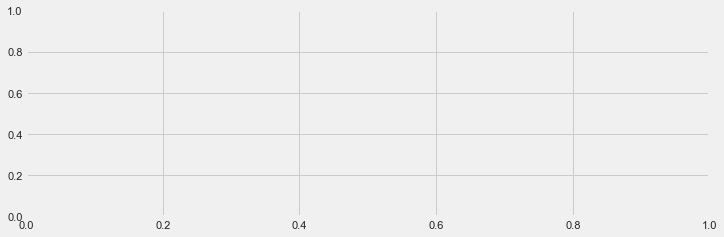

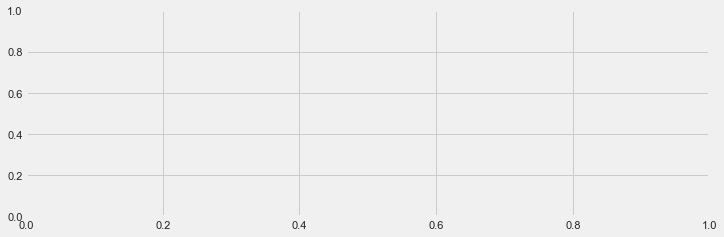

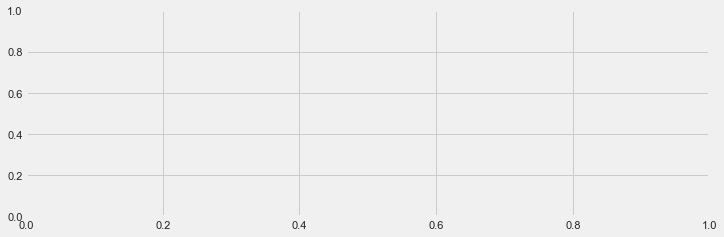

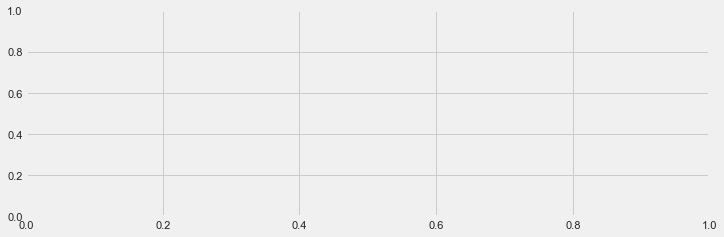

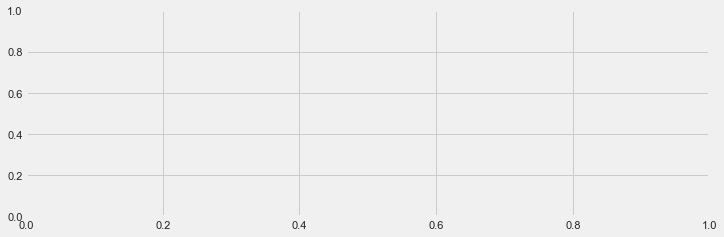

In [25]:
#Room Type
import plotly.offline as pyo
import plotly.graph_objs as go
#Setting up the color pallete
color_dict = {'Private room': '#cc5a49', 'Entire home/apt' : '#4586ac', 'Shared room' : '#21908d', 'Hotel room' : '#C0C0C0' }
#Group the room type using 'neighbourhood_group' as an index
airbnb_types=airbnb_montreal.groupby(['neighbourhood', 'room_type']).size()
#Create function to plot room type proportion on all region area
for neighbourhood in airbnb_montreal.neighbourhood.unique():
    
    plt.figure(figsize=(24,12))
    
    airbnb_reg=airbnb_types[neighbourhood]
    labels = airbnb_reg.index
    sizes = airbnb_reg.values
              
    colors = [color_dict[x] for x in labels]
    
    plot_num = 321
    plt.subplot(plot_num)
    reg_ch = go.Figure(data = [go.Pie(labels = labels, values = sizes, hole = 0.6)])
    reg_ch.update_traces(title = neighbourhood, marker=dict(colors=colors))
    reg_ch.show()
    
    plot_num += 1